<a href="https://colab.research.google.com/github/mashrukh-zaman/FashionMNIST/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dropout, Dense, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

In [ ]:
print('Train: X = %s, y = %s' % (train_X.shape, train_Y.shape))
print('Test: X = %s, y = %s' % (test_X.shape, test_Y.shape))

Train: X = (60000, 28, 28), y = (60000,)
Test: X = (10000, 28, 28), y = (10000,)


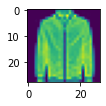

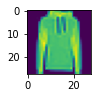

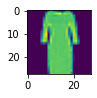

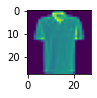

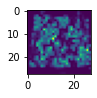

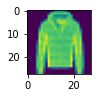

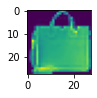

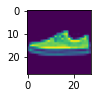

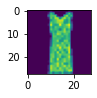

In [ ]:
import random
a = []
for i in range(0,9):
    n = random.randint(1,60000)
    a.append(n)
plt.figure(figsize=(6,6))
for i in range(len(a)):
    plt.subplot(340+ 1+ i)
    plt.imshow(train_X[a[i]])
    plt.show()

In [ ]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

train_X = train_X / 255
test_X = test_X / 255

In [ ]:
train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)

In [ ]:
model = tf.keras.Sequential()
model.add(Conv2D(32, 
                (3, 3), 
                  input_shape = (28, 28, 1), 
                  activation = 'relu', 
                  padding = 'same'))
model.add(Conv2D(32, 
                 (3, 3), 
                  activation = 'relu', 
                  padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
    
model.add(Conv2D(128, 
                 (3, 3),
                  activation = 'relu',
                  padding = 'same'))
model.add(Conv2D(128, 
                (3, 3),
                 activation = 'relu',
                 padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
    
model.add(Conv2D(256, 
                 (3, 3),
                  activation = 'relu',
                  padding = 'same'))
model.add(Conv2D(256, 
                (3, 3),
                 activation = 'relu',
                 padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
    
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))
    
model.compile(loss = 'binary_crossentropy', 
              metrics = ['accuracy'], 
              optimizer = 'adam')
    
model.summary()            

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 128)       36992     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 128)      

In [ ]:
model.fit(train_X, train_Y, batch_size = 1, epochs = 5, validation_split = 0.2)

Epoch 1/5
48000/48000 [==============================] - 181s 4ms/step - loss: 0.0522 - accuracy: 0.9003 - val_loss: 0.0756 - val_accuracy: 0.8622
Epoch 2/5
48000/48000 [==============================] - 180s 4ms/step - loss: 0.0518 - accuracy: 0.9023 - val_loss: 0.0658 - val_accuracy: 0.8907
Epoch 3/5
48000/48000 [==============================] - 181s 4ms/step - loss: 0.0504 - accuracy: 0.9069 - val_loss: 0.0852 - val_accuracy: 0.8823
Epoch 4/5
48000/48000 [==============================] - 181s 4ms/step - loss: 0.0504 - accuracy: 0.9084 - val_loss: 0.0762 - val_accuracy: 0.8949
Epoch 5/5
48000/48000 [==============================] - 180s 4ms/step - loss: 0.0503 - accuracy: 0.9049 - val_loss: 0.0635 - val_accuracy: 0.8845


In [ ]:
model.save('fashion.h5')

In [ ]:
test_loss,test_acc = model.evaluate(test_X, test_Y)
print('test loss = ', test_loss)
print('test accuracy = ', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0645 - accuracy: 0.8799
test loss =  0.06451424211263657
test accuracy =  0.8798999786376953


In [ ]:
x = 125
prediction = model.predict(test_X)
print(np.argmax(np.round(prediction[x])))

0


The Label is '[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]'


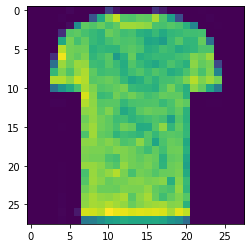

In [ ]:
plt.imshow(test_X[x].reshape(28,28))
print("The Label is '{}'".format(test_Y[x]))
plt.show()